# Importing the necessary modules

In [1]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import os
import glob

# Downloading the dataset from kaggle

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

100%|██████████| 427M/427M [00:01<00:00, 225MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


# Assiging Train and Test from the downloaded dataset

In [12]:
train_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"

## Import Libraries for CNN

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

## Visualization

In [13]:
# Data Loading and Preprocessing
from cv2 import cvtColor
from glob import glob

x_data = []
y_data = []

for category in glob(train_path + '/*'):
    for file in tqdm(glob(category + '/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB) # Important: Convert to RGB
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])

data = pd.DataFrame({'image': x_data, 'label': y_data})

100%|██████████| 12565/12565 [00:05<00:00, 2270.41it/s]


In [14]:
data.shape

(22564, 2)

In [15]:
from collections import Counter
Counter(y_data)

Counter({'R': 9999, 'O': 12565})

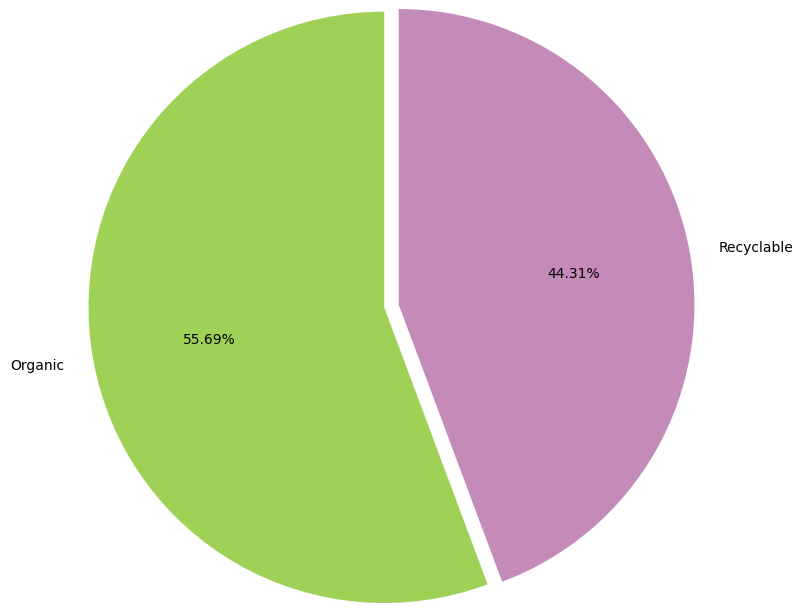

In [16]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.show()

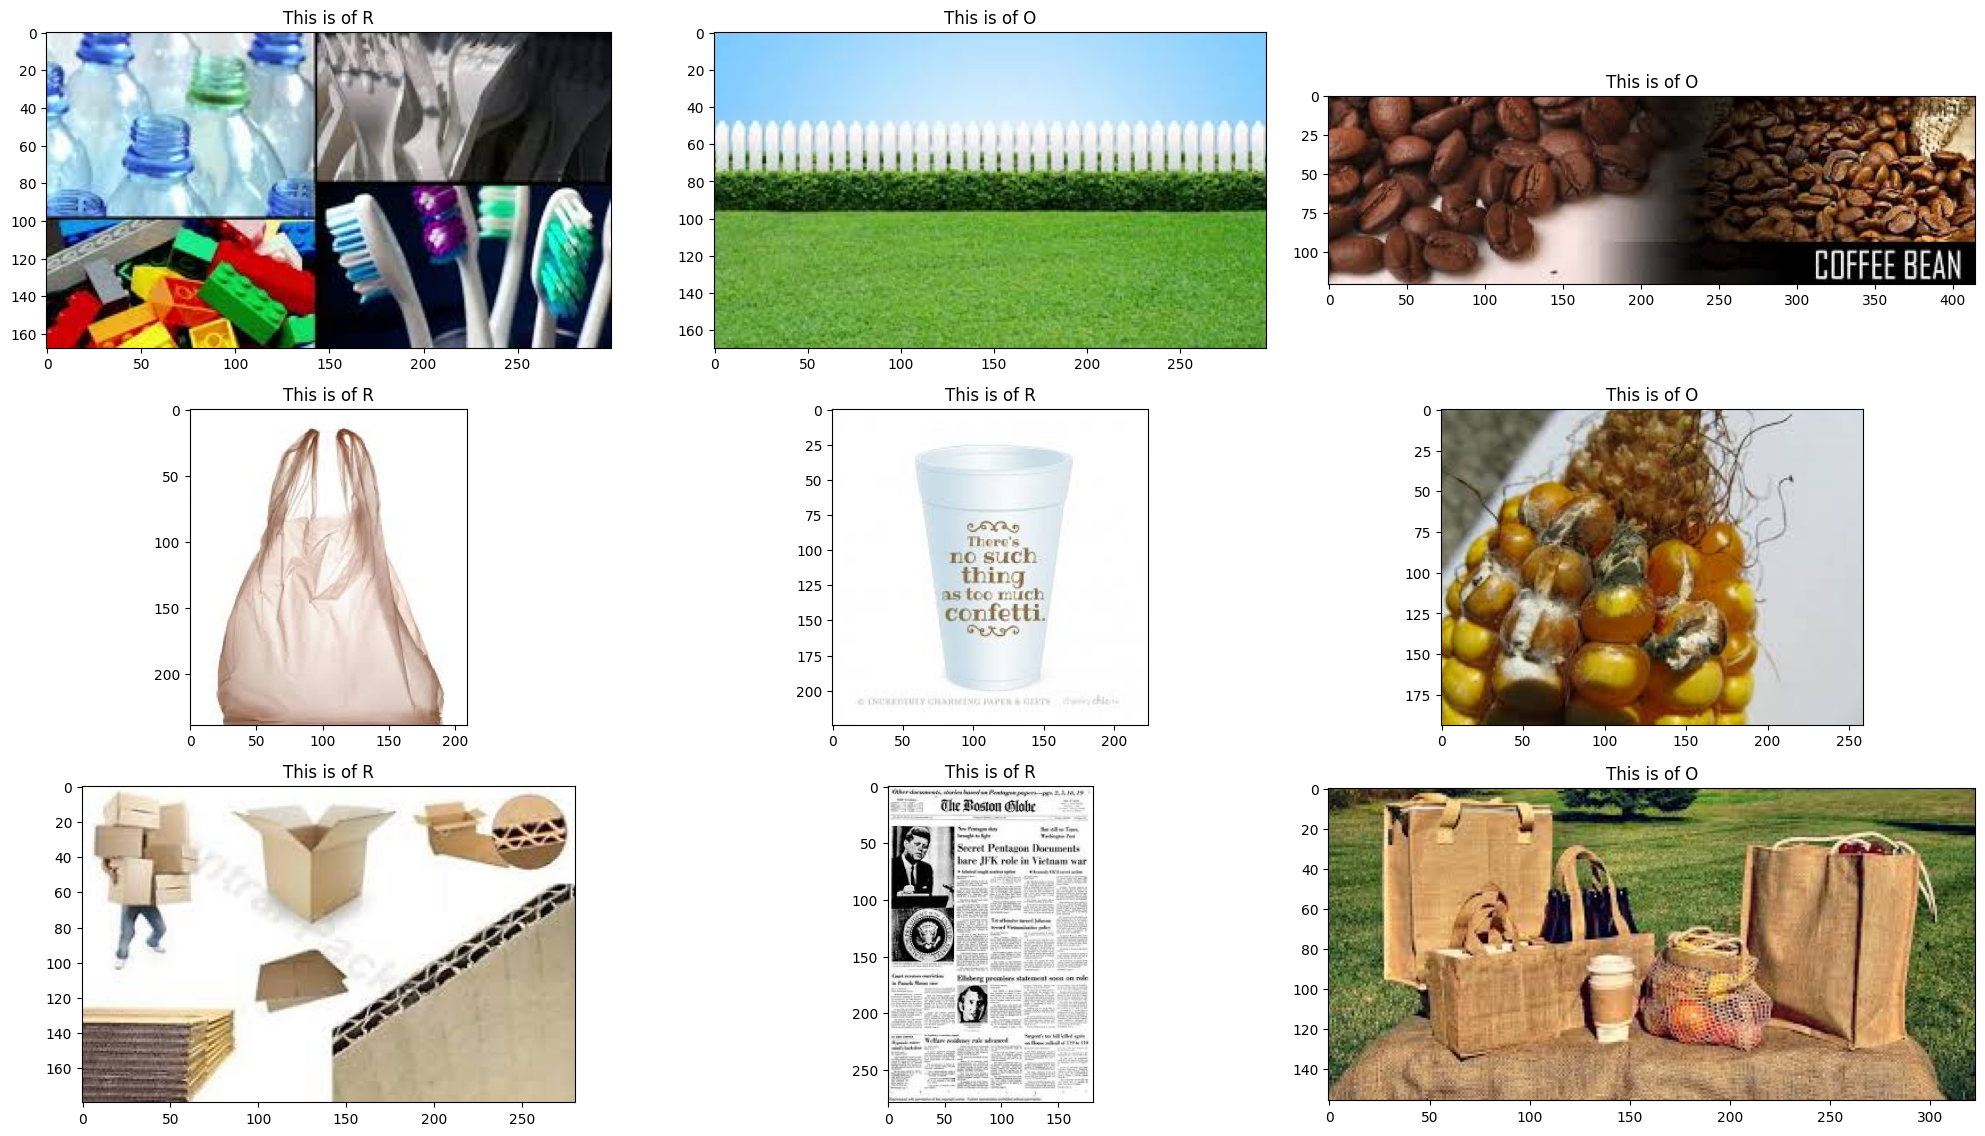

In [64]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

* O -> Organic
* R -> Recyclable

In [19]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


# Convolutional Neural Network - CNN

In [20]:
# Define model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

# Compile model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Adjust batch size
batch_size = 256  # Increased from 64 to stabilize training

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

# Data processing(rescaling)

In [22]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [23]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [24]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


# Training the model

In [25]:
hist = model.fit(
    train_generator,
    epochs=10,  # Reduced from 15 to prevent overfitting
    validation_data=test_generator)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 93s 773ms/step - accuracy: 0.6925 - loss: 0.6438 - val_accuracy: 0.8663 - val_loss: 0.3283
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 574ms/step - accuracy: 0.8287 - loss: 0.4124 - val_accuracy: 0.8651 - val_loss: 0.3258
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 572ms/step - accuracy: 0.8380 - loss: 0.3852 - val_accuracy: 0.8528 - val_loss: 0.3336
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 563ms/step - accuracy: 0.8508 - loss: 0.3670 - val_accuracy: 0.8898 - val_loss: 0.2842
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 562ms/step - accuracy: 0.8743 - loss: 0.3181 - val_accuracy: 0.8854 - val_loss: 0.2758
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 560ms/step - accuracy: 0.8751 - loss: 0.3165 - val_accuracy: 0.8953 - val_loss: 0.2715
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 561ms/step - accuracy: 0.8890 - loss: 0.2774 - val_accuracy: 0.8715 - val_loss: 0.3262
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 553ms/step - accuracy: 0.9051 - loss: 0.2435 - val_accu

# Checking the model performance

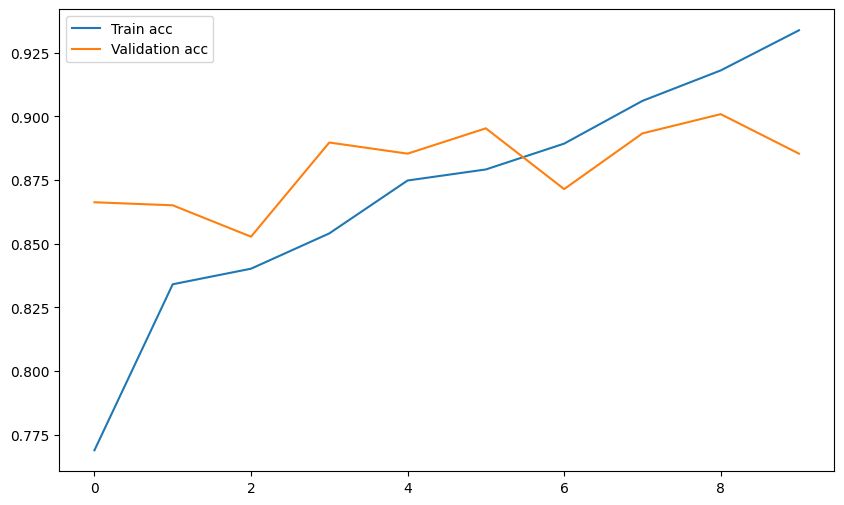

In [26]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

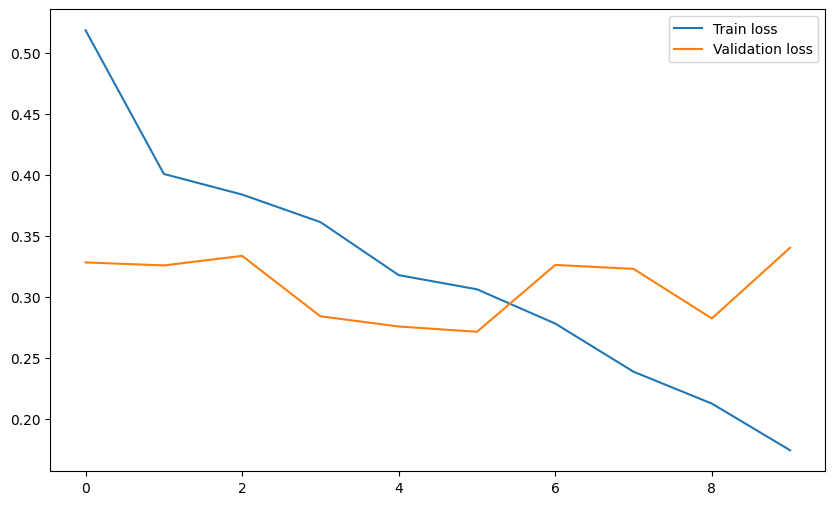

In [27]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

## Model Prediction

In [52]:
def predict_func(img):
    # Display the image
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()

    # Preprocessing the image
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224, 3])

    # Make the prediction
    predictions = model.predict(img)

    # Get the class with the highest probability
    result = np.argmax(predictions)

    # Display the result
    if result == 0:
        print(f"This is Recyclable")
    elif result == 1:
        print(f"This is Organic")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
This is Organic


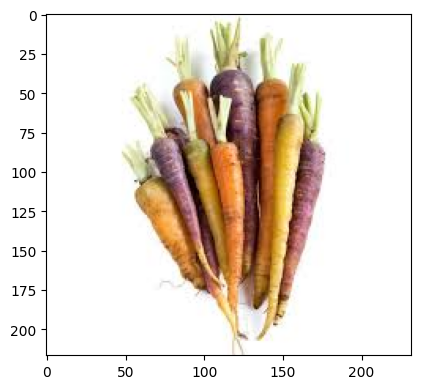

In [54]:
test_img = cv2.imread("/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST/O/O_12574.jpg")
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
This is Recyclable


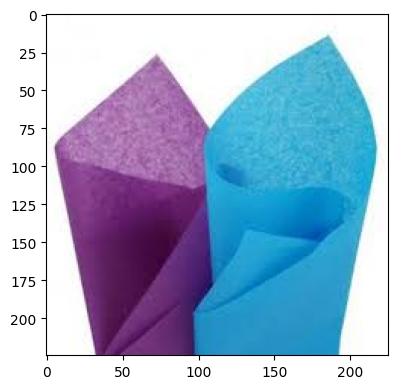

In [55]:
test_img = cv2.imread("/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST/R/R_10753.jpg")
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
This is Recyclable


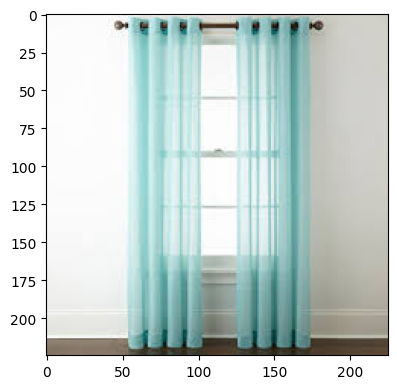

In [56]:
test_img = cv2.imread("/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST/R/R_10376.jpg")
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
This is Organic


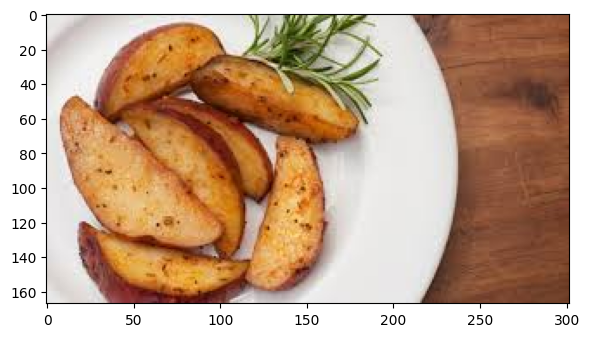

In [62]:
test_img = cv2.imread("/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST/O/O_13005.jpg")
predict_func(test_img)

# Save the model

In [65]:

model.save('waste_classification_model.h5')


# Converting the saved model into tflite(Tensorflow Lite)

In [67]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/waste_classification_model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", "wb") as f:
    f.write(tflite_model)
print("TFLite model saved successfully!")

Saved artifact at '/tmp/tmp5huqa01g'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  139144641811600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139144611966864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139144611969360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139144611954960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139144611970320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139144614803600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139144614803024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139144614804944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139144614801296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139144614801488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139143277250512